# 🛒 Customer Segmentation using KMeans

## 📌 Introduction
Customer segmentation is a key business strategy that involves dividing customers into distinct groups based on their purchasing behavior and demographic profiles.  
By applying **unsupervised machine learning techniques** such as **KMeans clustering**, businesses can identify meaningful customer segments and target them with tailored marketing strategies.  

In this project, we:
- **Preprocess the dataset** (handle missing values, encode categorical variables, and scale numerical features).  
- **Apply clustering (KMeans)** to identify natural groupings of customers.  
- **Determine the optimal number of clusters** using the Elbow Method and Silhouette Score.  
- **Visualize customer segments** using PCA for dimensionality reduction.  
- **Profile each cluster** to derive actionable insights for business decision-making.  

### 🎯 Business Value
Effective segmentation enables companies to:
- Identify **high-value customers** and focus retention strategies on them.  
- Recognize **budget-conscious shoppers** for discounts/promotions.  
- Discover **young/high-spending segments** for brand partnerships.  
- Personalize marketing campaigns to increase revenue and customer satisfaction.  

---

### Step 1: Import Required Libraries
We start by importing the necessary Python libraries for data handling, visualization, preprocessing, and clustering.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

### Step 2: Load Dataset
We load the dataset containing customer information.  
Example dataset: **customers.csv** with columns such as *CustomerID, Age, Annual Income, Spending Score*.

In [6]:
df = pd.read_csv("customers.csv")

print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Step 3: Data Preprocessing
- Drop irrelevant columns like `CustomerID` if present.  
- Handle missing values.  
- Standardize numerical features for clustering.

In [13]:
# Drop ID column if present
if 'CustomerID' in df.columns:
    df = df.drop('CustomerID', axis=1)

# Handle missing values
df = df.dropna()

# Encode categorical features (like Gender)
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Scale numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


### Step 4: Determine Optimal Number of Clusters
We use two methods:
1. **Elbow Method** – checks the Within-Cluster-Sum-of-Squares (WCSS).
2. **Silhouette Score** – measures how well-separated the clusters are.

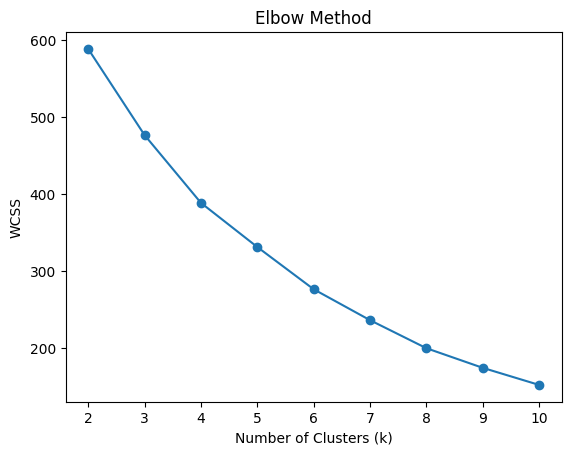

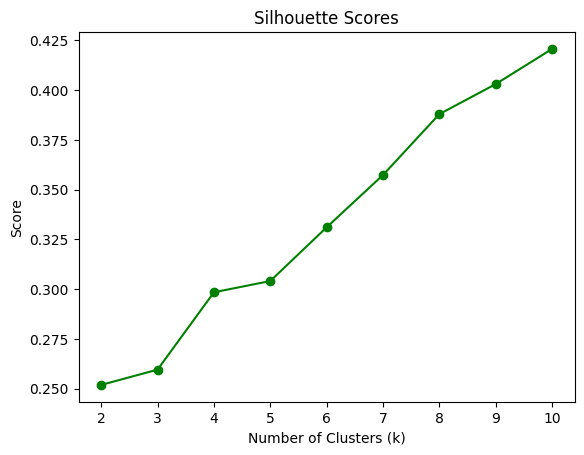

In [16]:
wcss = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# Plot Elbow Method
plt.plot(range(2,11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.show()

# Plot Silhouette Scores
plt.plot(range(2,11), silhouette_scores, marker='o', color='green')
plt.title("Silhouette Scores")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Score")
plt.show()

### Step 5: Apply KMeans Clustering
Using the chosen optimal number of clusters (e.g., **k = 4**), we fit the KMeans model and assign cluster labels to each customer.

In [19]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_data)

### Step 6: Visualize Clusters with PCA
Since clustering happens in multi-dimensional space, we use **PCA (Principal Component Analysis)** to reduce the data to 2D for visualization.

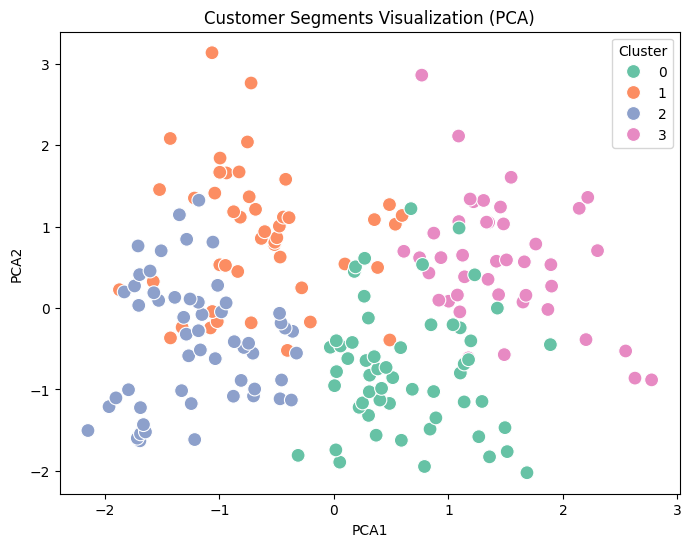

In [22]:
pca = PCA(2)
reduced_data = pca.fit_transform(scaled_data)
df['PCA1'] = reduced_data[:,0]
df['PCA2'] = reduced_data[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="Set2", s=100)
plt.title("Customer Segments Visualization (PCA)")
plt.show()


### Step 7: Cluster Profiling
We summarize the characteristics of each cluster by calculating the average feature values.

In [25]:
cluster_summary = df.groupby('Cluster').mean()
cluster_summary

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,PCA1,PCA2
Cluster,,,,,,
0,47.803571,58.071429,34.875000,0.0,0.643591,-0.756396
1,28.000000,62.239130,64.826087,1.0,-0.661747,0.895612
2,28.392857,60.428571,68.178571,0.0,-1.203347,-0.409660
3,52.738095,62.214286,30.642857,1.0,1.471112,0.573833
